In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from cslib import fetch_ts
from IPython.display import Image
%matplotlib inline

In [3]:
pd.pandas.set_option('display.max_columns', None)
pd.set_option("display.max_columns", 100)
sns.set(rc={'figure.figsize':(11, 4)})
base_dir = os.getcwd()
DATA_DIR = os.path.join(base_dir , "data" , "cs-train")
ts_data_dir = os.path.join(DATA_DIR , "ts-data")
plt.style.use('seaborn')

In [4]:
# get time series formatted data
ts_data = fetch_ts(DATA_DIR)
df = pd.DataFrame(ts_data["all"])
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.head()

... loading ts data from files


,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
date,,,,,,
2017-11-01,0,0,0,0,2017-11,0.0
2017-11-02,0,0,0,0,2017-11,0.0
2017-11-03,0,0,0,0,2017-11,0.0
2017-11-04,0,0,0,0,2017-11,0.0
2017-11-05,0,0,0,0,2017-11,0.0


In [5]:
df.shape

(607, 6)

<AxesSubplot:xlabel='revenue', ylabel='Density'>

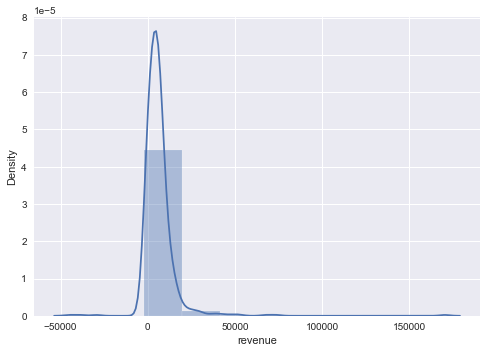

In [13]:
# Revenue Distribution
sns.distplot(df['revenue'], bins=10)

<AxesSubplot:xlabel='date', ylabel='Density'>

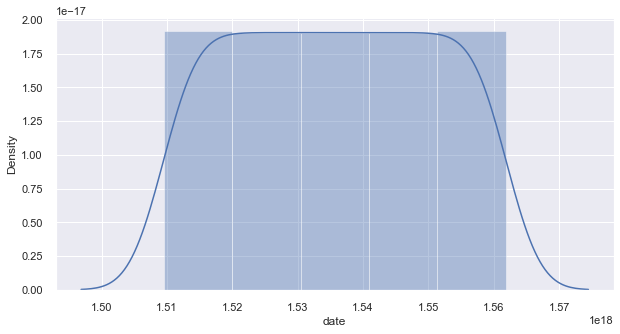

In [25]:
# Date Distribution
sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(df.index, bins=5)

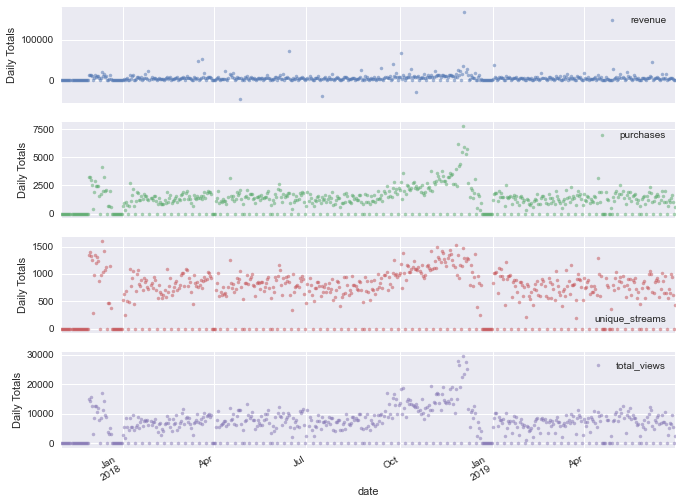

In [68]:

# Plotting daily totals wrt to all Dates

cols_plot = ['revenue', 'purchases', 'unique_streams', 'total_views']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

# Time Series exibits periodicity (seasonality) during October leading upto Holidays in Dec/Jan 
# All the variables have high peaks. But less during 2017 year end.

Text(0, 0.5, 'Daily Revenue')

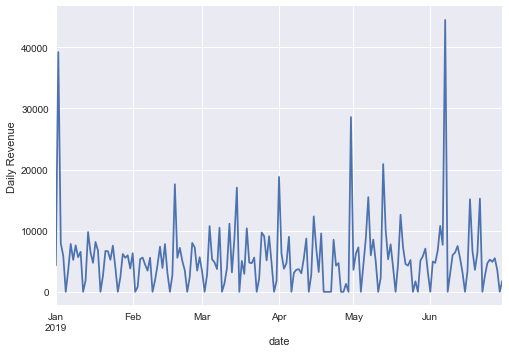

In [69]:
# Plotting revenue for an year

ax = df.loc['2019', 'revenue'].plot()
ax.set_ylabel('Daily Revenue')

Text(0, 0.5, 'Daily Revenue')

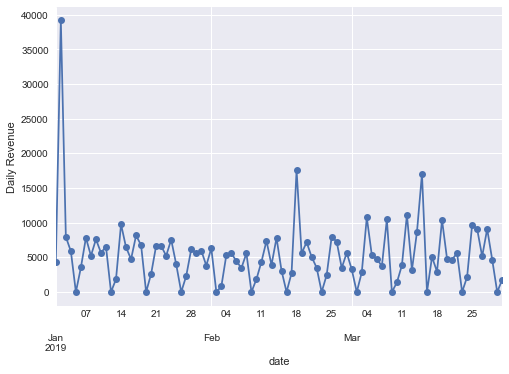

In [70]:
# Plotting daily revenue totals wrt to Jan till March

ax = df.loc['2019-01':'2019-03', 'revenue'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Revenue')

# Upon zooming in, Revenue observed to deep during weekends. Maybe due to people travel on weekends. 

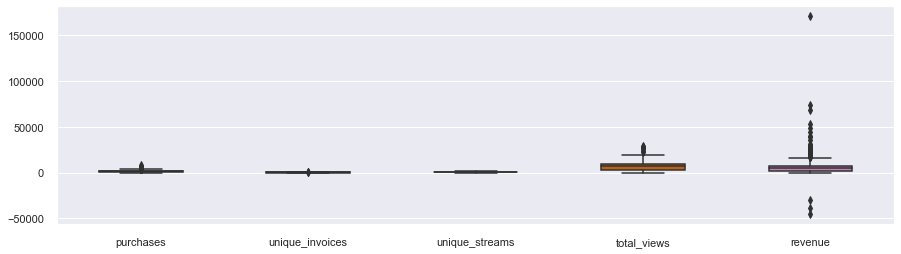

In [90]:
cols_plot = ['revenue', 'purchases', 'unique_streams', 'total_views']
sns.set(rc={'figure.figsize':(15, 4)})
bplot = sns.boxplot(data=df, width=0.5, palette="colorblind")